# House Prices Kaggle Competition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv("./house_prices/train.csv",low_memory=False)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# df.head().T

In [5]:
# df.info()

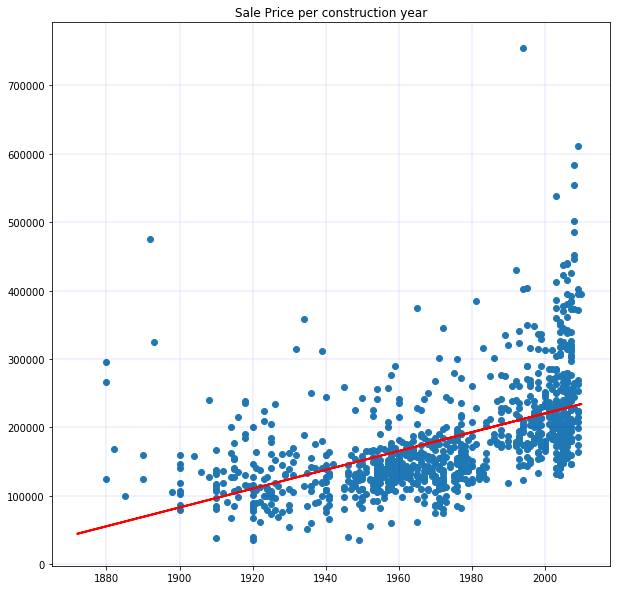

In [6]:
x = np.concatenate((df["YearBuilt"][:500],df["YearBuilt"][500:]))
y = np.concatenate((df["SalePrice"][:500],df["SalePrice"][500:]))
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,p(x),"r-",linewidth=2)
ax.grid(color='b', linestyle='-', linewidth=0.1)
ax.set_title('Sale Price per construction year')
ax.scatter(df["YearBuilt"][:1000],df["SalePrice"][:1000],)

### We clearly can see a raise in SalePrice as years constructed is closer 

In [7]:
# print('Sale price has',df.SalePrice.isna().sum(),'NaN values')
# print('Year Built has',df.YearBuilt.isna().sum(),'NaN values')

We don't have missing values in sales price and year built

C:\Users\User\Anaconda3\envs\awesome\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


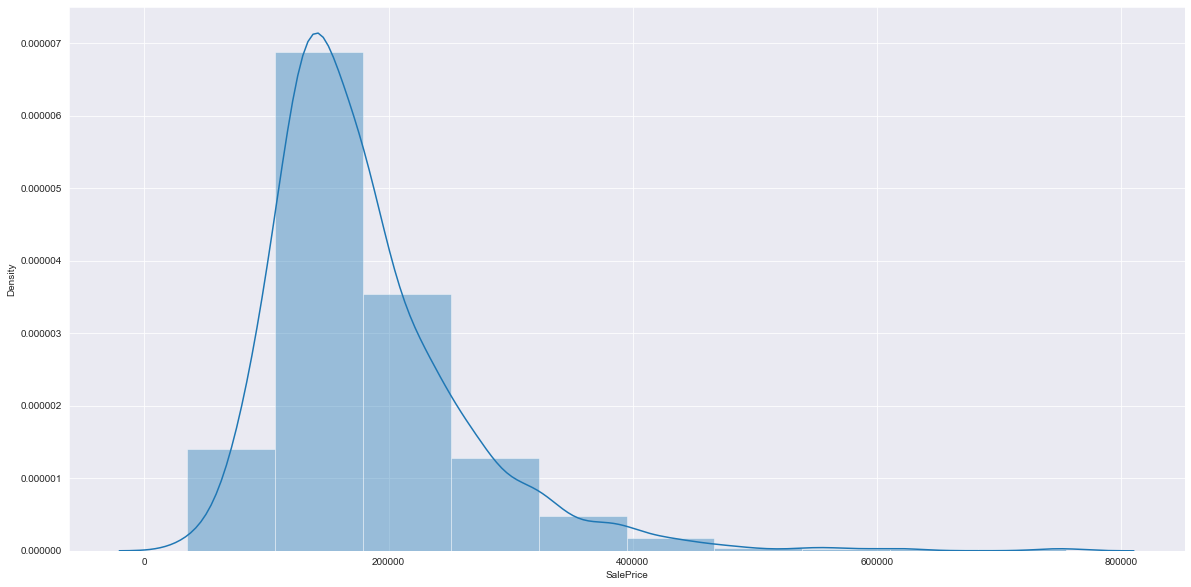

In [8]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.distplot(df.SalePrice,bins=10,kde=True)

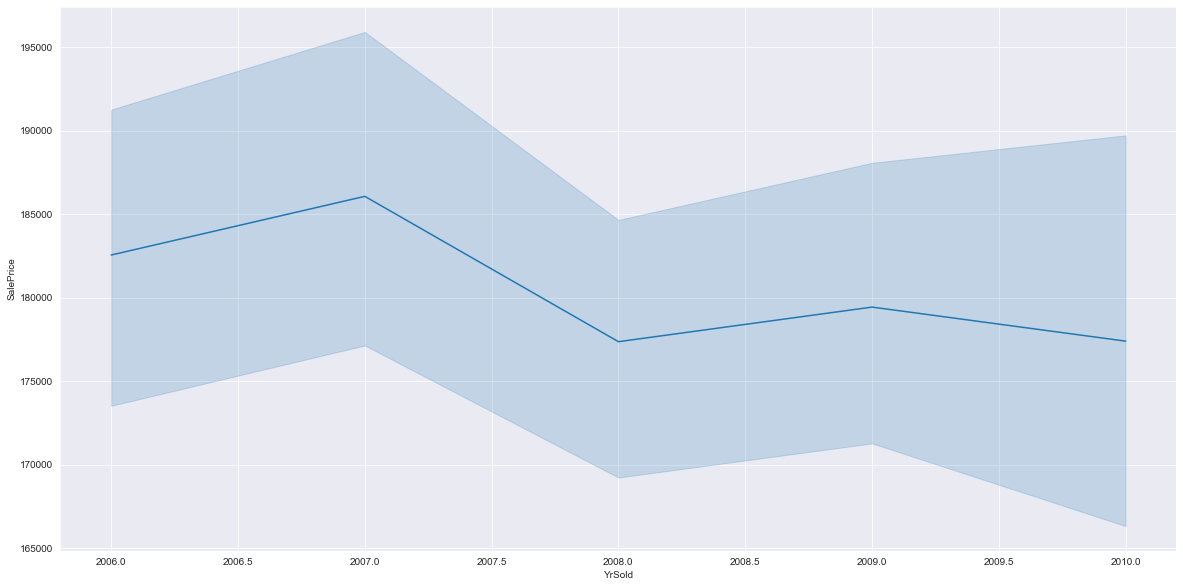

In [9]:
plt.figure(figsize=(20,10))
sns.lineplot(x="YrSold", y="SalePrice",data=df)

## We see a small drop in Sale price as the year is more close

# Now we will take care of missing values

In [10]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

### Ok we can handle it

In [11]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(content.median())

## Ok now lets explore the data more and kepp only few columns to operate ElasticNet and Lasso Colab

In [12]:
# corr_matrix = df.corr()
# fig, ax = plt.subplots(figsize=(30,30))
# ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.2,fmt=".2f",cmap="hot")

## After this correlation matrix we see that sale price depends on

* GarageArea
* GarageCars
* GarageYrBlt
* Fireplaces
* TotRmsAbvGrd
* FullBath
* GrLivArea
* 1stFlrSF
* TotalBsmtSF
* BsmntFinSF1
* MansVnrArea
* YearRemodAdd
* YearBuilt
* OverallQual

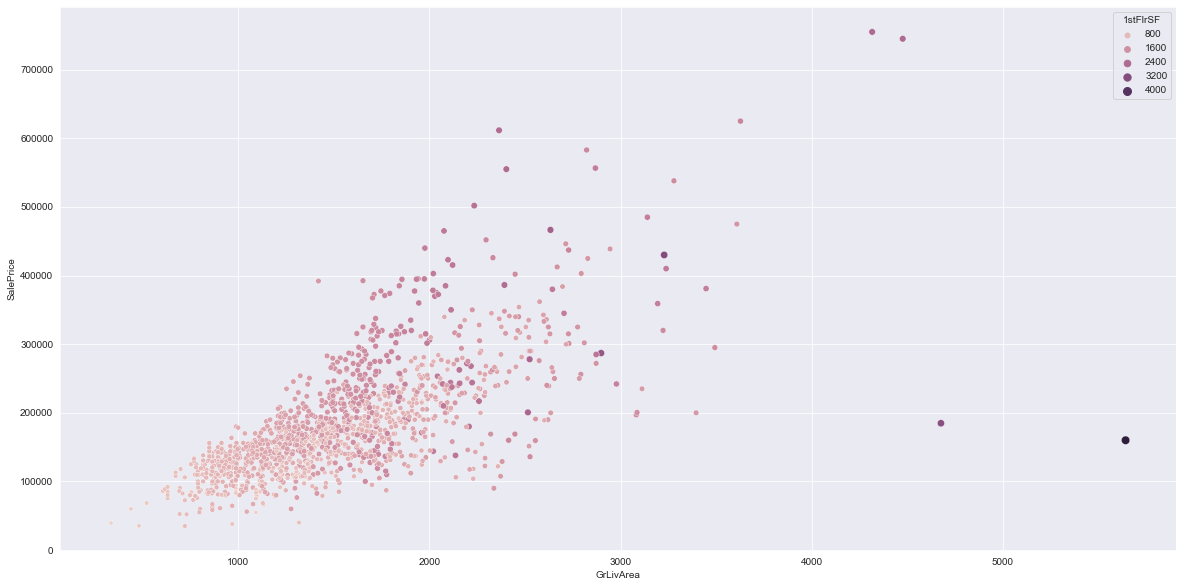

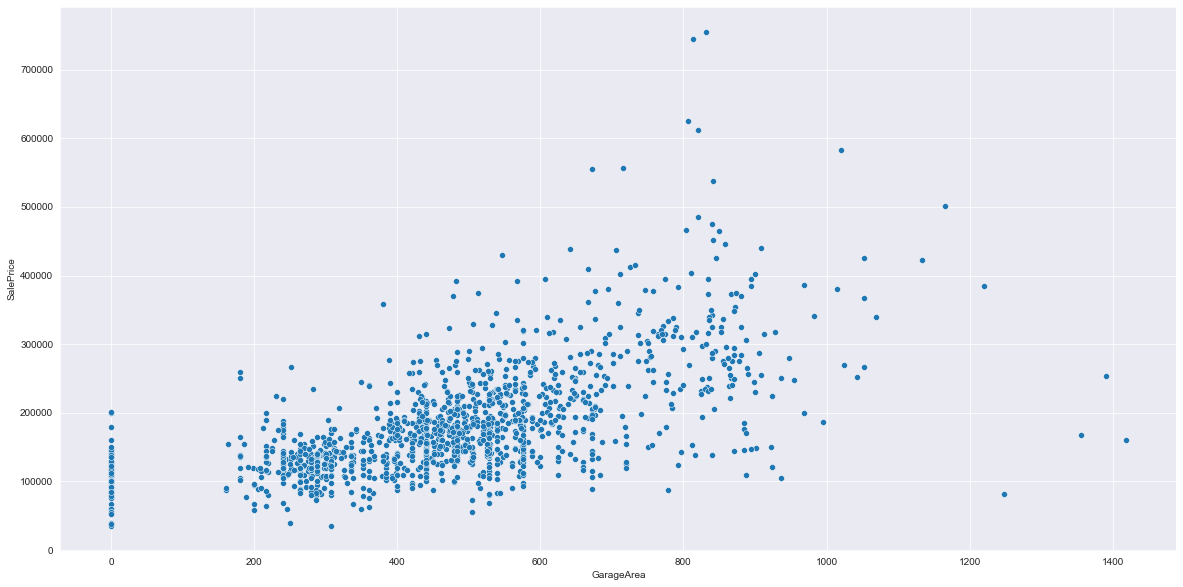

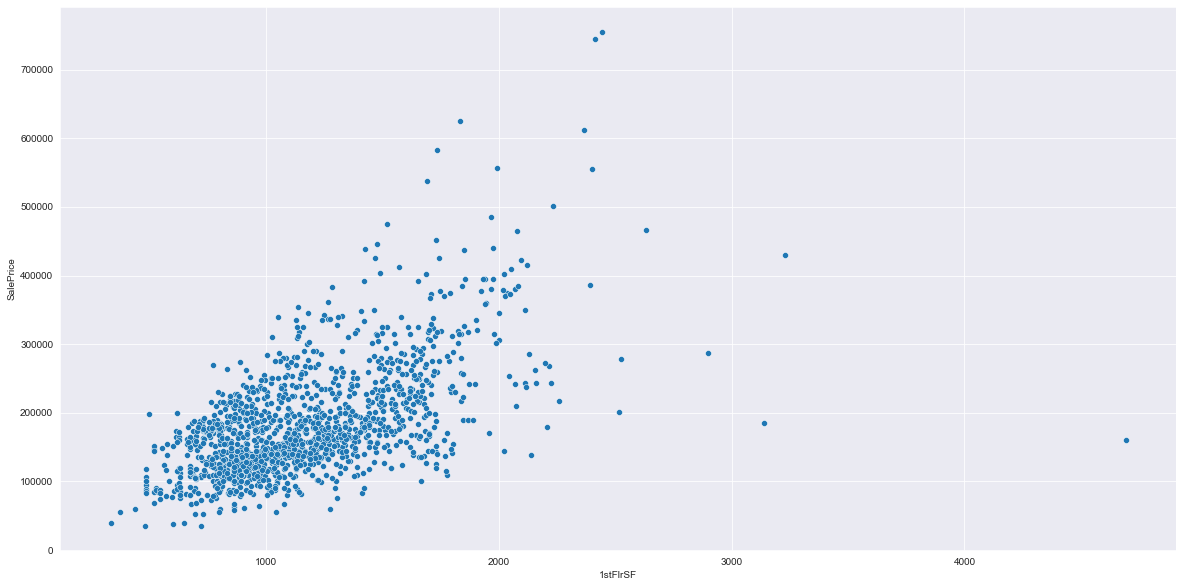

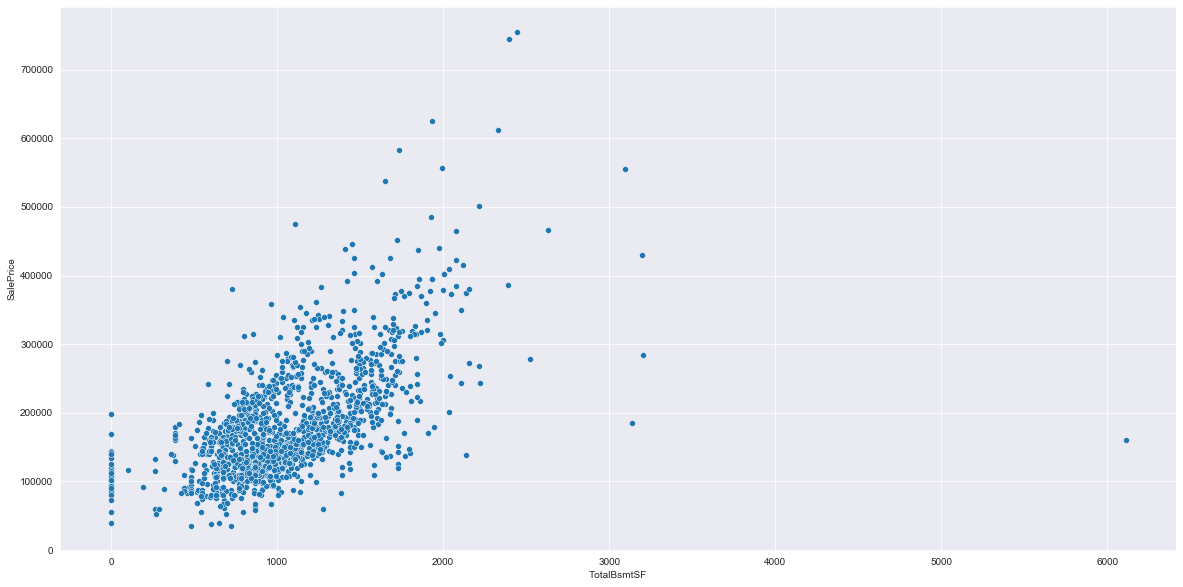

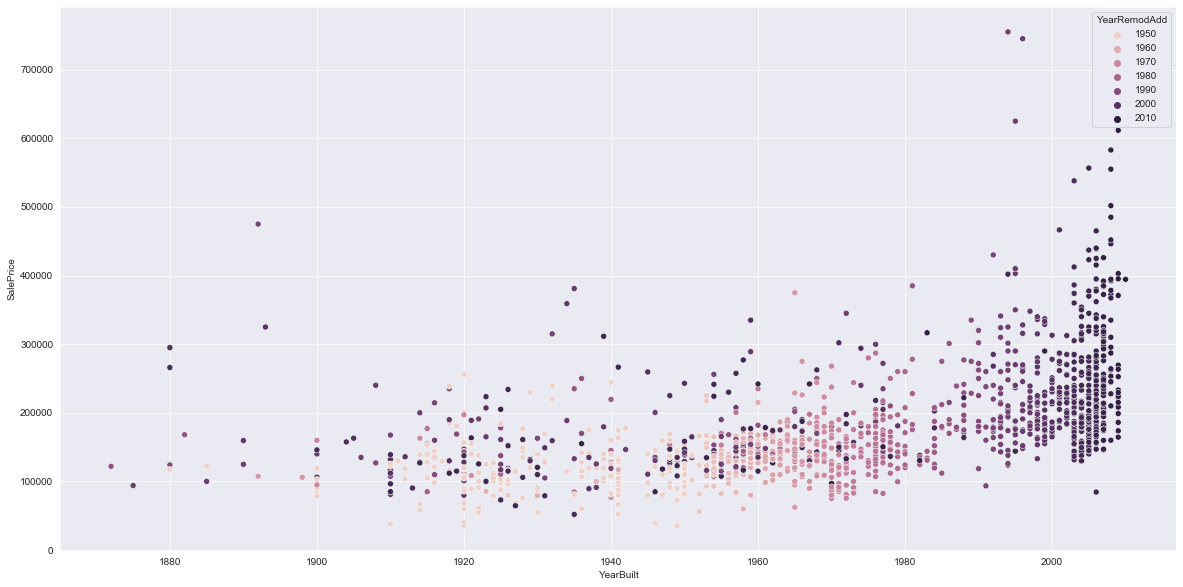

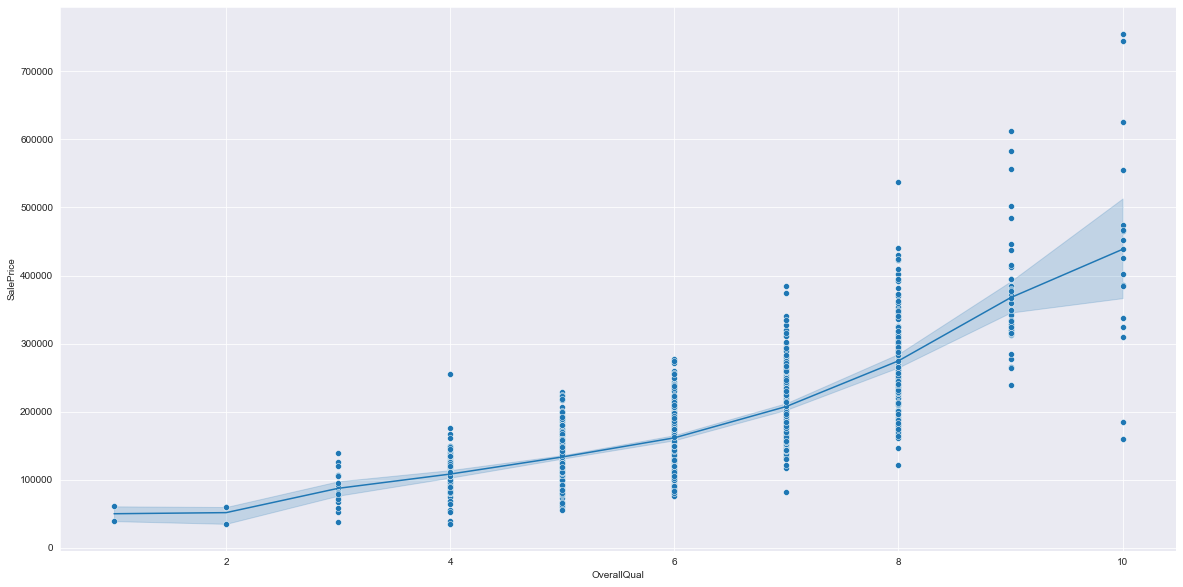

In [13]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.scatterplot(x="GrLivArea", y="SalePrice", size="1stFlrSF",hue="1stFlrSF",data=df)
plt.figure(figsize=(20,10))
sns.scatterplot(x="GarageArea", y="SalePrice",data=df)
plt.figure(figsize=(20,10))
sns.scatterplot(x="1stFlrSF", y="SalePrice",data=df)
plt.figure(figsize=(20,10))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice",data=df)
plt.figure(figsize=(20,10))
sns.scatterplot(x="YearBuilt", y="SalePrice",hue="YearRemodAdd",data=df)
plt.figure(figsize=(20,10))
sns.lineplot(x="OverallQual", y="SalePrice",data=df)
sns.scatterplot(x="OverallQual", y="SalePrice",data=df)

## We see he have 2 outliers in price and 1 in TotalBsmntSF, 1stFlrSF, GrLivArea

In [14]:
df = df[df['SalePrice']<=700000]
df = df[df['TotalBsmtSF']<=8000]
df = df[df['1stFlrSF']<=4000]
df = df[df['GrLivArea']<=4000]

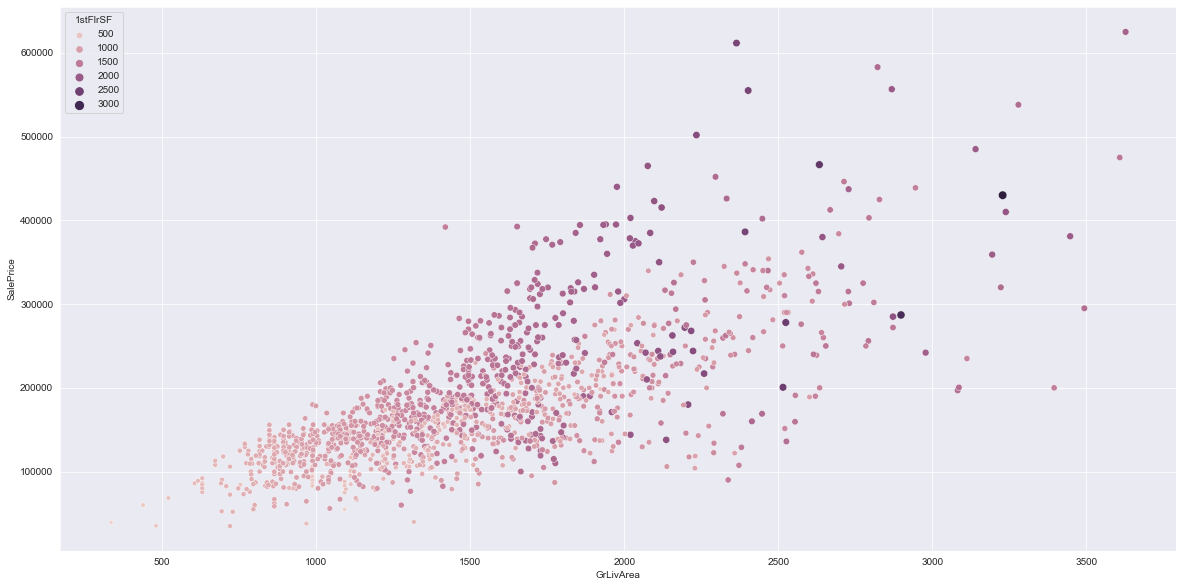

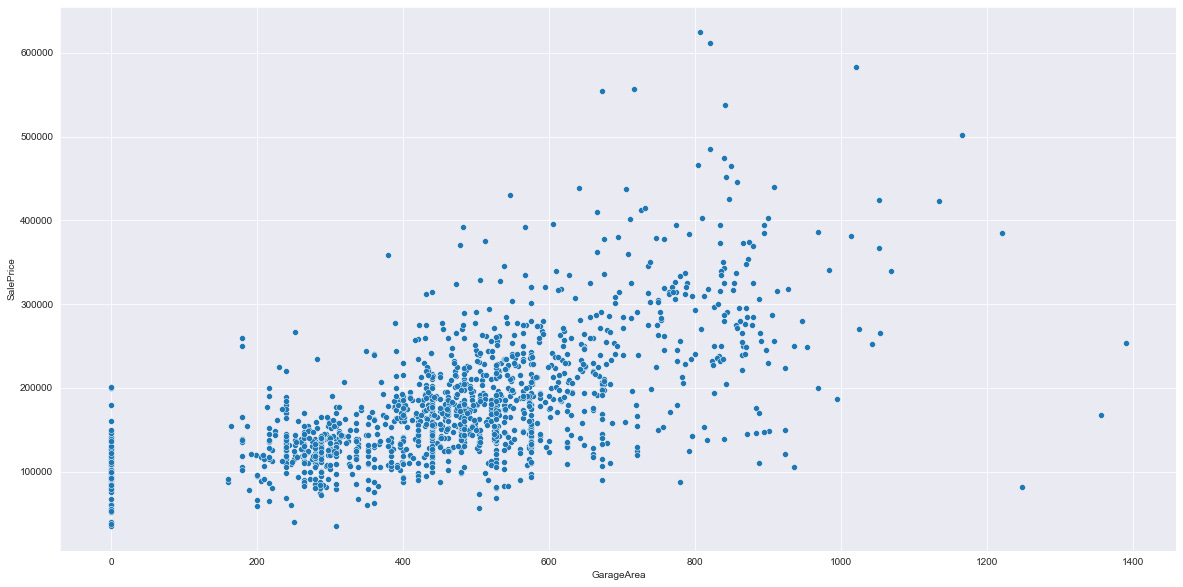

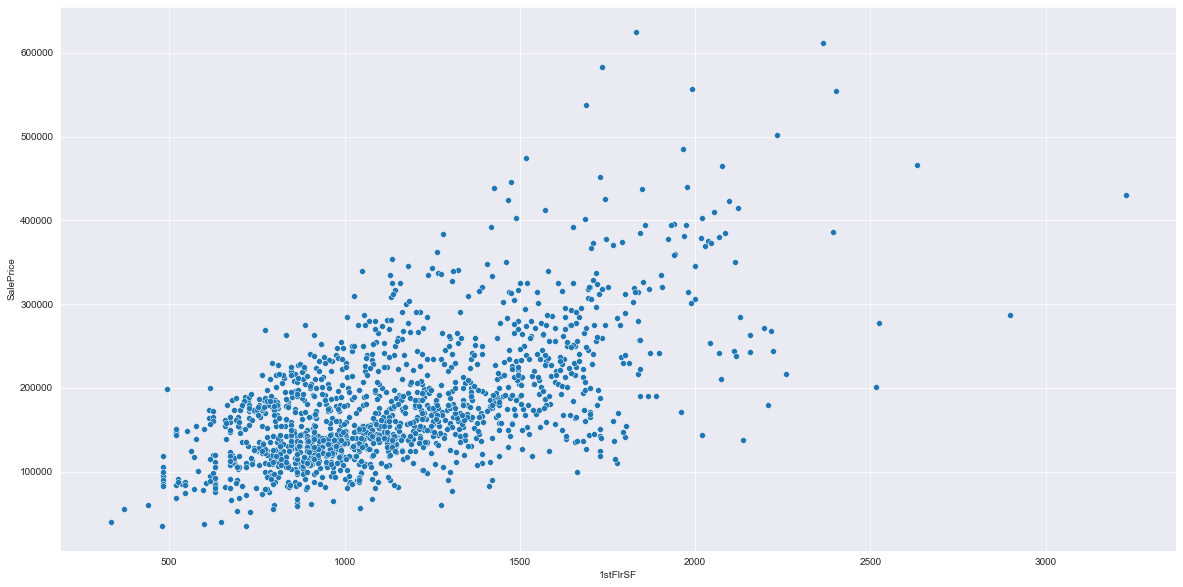

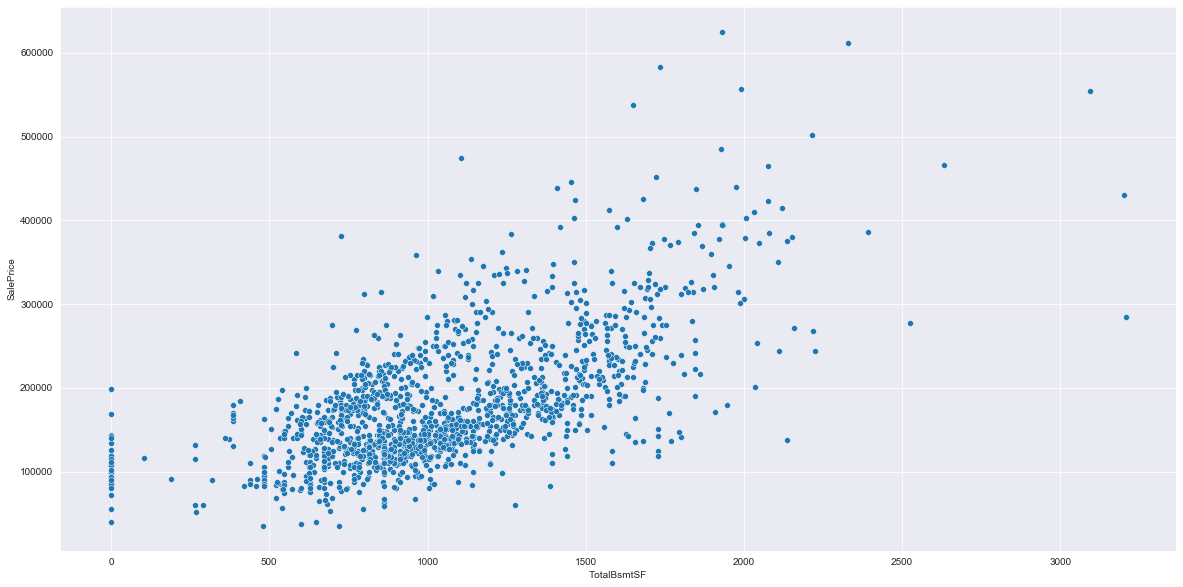

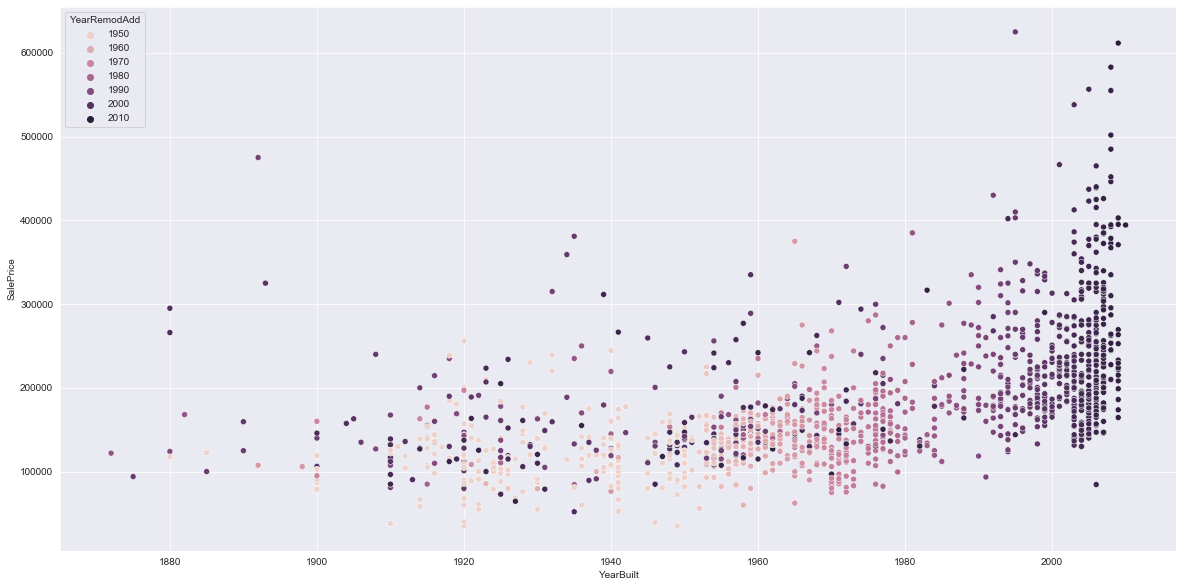

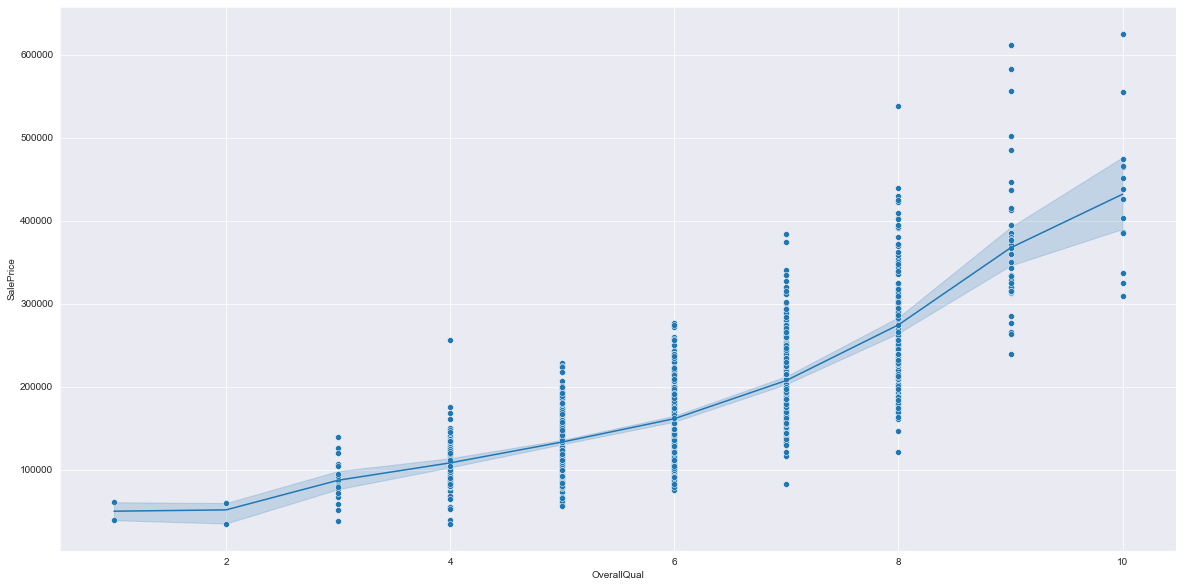

In [15]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.scatterplot(x="GrLivArea", y="SalePrice", size="1stFlrSF",hue="1stFlrSF",data=df)
plt.figure(figsize=(20,10))
sns.scatterplot(x="GarageArea", y="SalePrice",data=df)
plt.figure(figsize=(20,10))
sns.scatterplot(x="1stFlrSF", y="SalePrice",data=df)
plt.figure(figsize=(20,10))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice",data=df)
plt.figure(figsize=(20,10))
sns.scatterplot(x="YearBuilt", y="SalePrice",hue="YearRemodAdd",data=df)
plt.figure(figsize=(20,10))
sns.lineplot(x="OverallQual", y="SalePrice",data=df)
sns.scatterplot(x="OverallQual", y="SalePrice",data=df)

In [16]:
# sns.jointplot(height=12, data=df, x="Fireplaces", y="SalePrice", kind="scatter")
# # kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'

So we will keep only those! Except fireplaces that doesn't seem to help

## Now convert categorical values

In [17]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = pd.Categorical(content).codes + 1

for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = pd.Categorical(content).codes + 1
        
# df.to_csv('HousePrices.csv',index=False)

In [18]:
GoodCorr = ['GarageArea','GarageCars','GarageYrBlt','TotRmsAbvGrd','FullBath','GrLivArea','1stFlrSF',
           'TotalBsmtSF','BsmtFinSF1','MasVnrArea','YearRemodAdd','YearBuilt','OverallQual','SalePrice']

In [19]:
new_df = df[GoodCorr]

In [20]:
new_df.head()

,GarageArea,GarageCars,GarageYrBlt,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,BsmtFinSF1,MasVnrArea,YearRemodAdd,YearBuilt,OverallQual,SalePrice
0,548,2,2003.0,8,2,1710,856,856,706,196.0,2003,2003,7,208500
1,460,2,1976.0,6,2,1262,1262,1262,978,0.0,1976,1976,6,181500
2,608,2,2001.0,6,2,1786,920,920,486,162.0,2002,2001,7,223500
3,642,3,1998.0,7,1,1717,961,756,216,0.0,1970,1915,7,140000
4,836,3,2000.0,9,2,2198,1145,1145,655,350.0,2000,2000,8,250000


In [21]:
# plt.figure(figsize=(20,10))
# sns.set_style('darkgrid')
# sns.scatterplot(x="LotArea", y="SalePrice",data=df)
# plt.figure(figsize=(20,10))
# sns.distplot(df.Alley,kde=False,bins=3)

In [22]:
new_df.to_csv('HousePricesBestCorr.csv',index=False)

In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [24]:
# X = new_df.drop(['SalePrice'],axis=1)
# y = new_df.SalePrice
X = df.drop(['SalePrice','Id'],axis=1)
y = df.SalePrice
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [26]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.0005,
                max_depth = 40,n_jobs=4, n_estimators = 50000 )

In [27]:
# xg_reg.fit(X_train,y_train,eval_metric=['rmse'],eval_set=[(X_train, y_train), (X_test, y_test)],verbose=False)
xg_reg.fit(X,y,eval_metric=['rmse'],eval_set=[(X, y)],verbose=False)
preds = xg_reg.predict(X_test)

Training RMSE is 17.209963


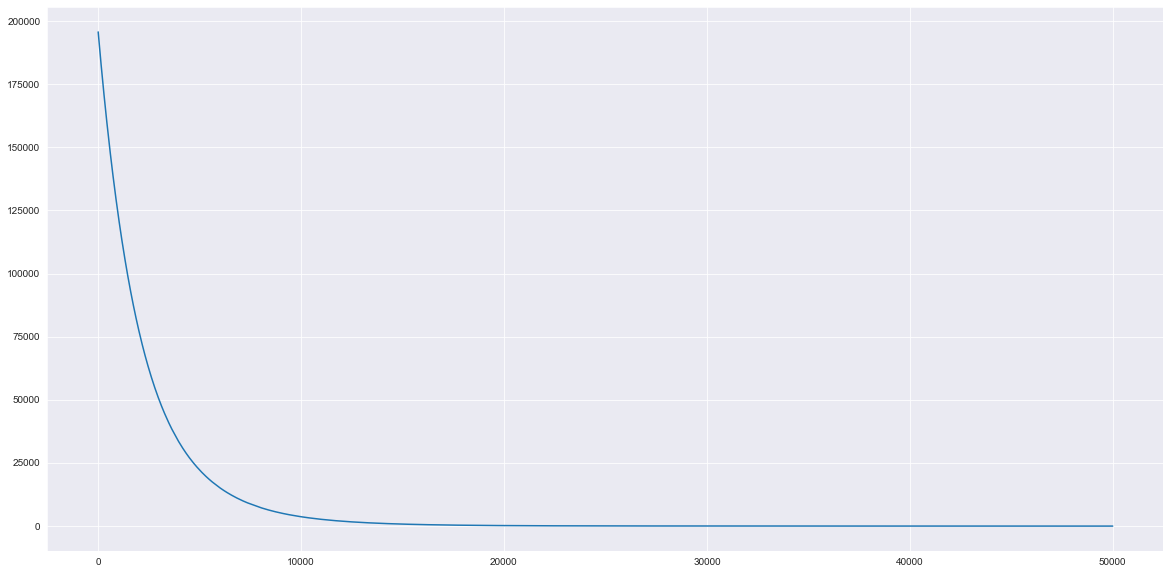

In [28]:
evals_result = xg_reg.evals_result()
print('Training RMSE is',evals_result['validation_0']['rmse'].pop())
plt.figure(figsize=(20,10))
# print('Validation RMSE is',evals_result['validation_1']['rmse'].pop())
plt.plot(evals_result['validation_0']['rmse'])
# plt.plot(evals_result['validation_1']['rmse'])

In [29]:
test = pd.read_csv('./house_prices/test.csv')

In [30]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [31]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [32]:
for label,content in test.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
        
for label,content in test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test[label] = content.fillna(content.median())

for label,content in test.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test[label] = pd.Categorical(content).codes + 1

for label,content in test.items():
    if pd.api.types.is_string_dtype(content):
        test[label] = pd.Categorical(content).codes + 1

In [33]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,0,4,4,1,...,120,0,0,3,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,0,1,4,1,...,0,0,0,0,1,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,0,1,4,1,...,0,0,0,3,0,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,0,1,4,1,...,0,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,0,1,2,1,...,144,0,0,0,0,0,1,2010,9,5


In [34]:
GoodCorrTest = ['Id','GarageArea','GarageCars','GarageYrBlt','TotRmsAbvGrd','FullBath','GrLivArea','1stFlrSF',
           'TotalBsmtSF','BsmtFinSF1','MasVnrArea','YearRemodAdd','YearBuilt','OverallQual']

test_new = test[GoodCorrTest]

In [35]:
test_new.head()

,Id,GarageArea,GarageCars,GarageYrBlt,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,BsmtFinSF1,MasVnrArea,YearRemodAdd,YearBuilt,OverallQual
0,1461,730.0,1.0,1961.0,5,1,896,896,882.0,468.0,0.0,1961,1961,5
1,1462,312.0,1.0,1958.0,6,1,1329,1329,1329.0,923.0,108.0,1958,1958,6
2,1463,482.0,2.0,1997.0,6,2,1629,928,928.0,791.0,0.0,1998,1997,5
3,1464,470.0,2.0,1998.0,7,2,1604,926,926.0,602.0,20.0,1998,1998,6
4,1465,506.0,2.0,1992.0,5,2,1280,1280,1280.0,263.0,0.0,1992,1992,8


In [36]:
# ids = test_new['Id']
ids = test['Id']

In [37]:
# X_test =  test_new.drop('Id',axis=1)
X_test =  test.drop('Id',axis=1)

In [38]:
y_test_preds = xg_reg.predict(X_test)

In [39]:
y_test_preds

array([123169.16, 153179.25, 182738.05, ..., 164891.97, 114655.58,
       227159.98], dtype=float32)

In [40]:
data = {'Id':ids,'SalePrice':y_test_preds}

In [41]:
submission = pd.DataFrame(data)

In [42]:
submission.head()

,Id,SalePrice
0,1461,123169.156250
1,1462,153179.250000
2,1463,182738.046875
3,1464,187949.437500
4,1465,185160.187500


In [43]:
compression_opts = dict(method='zip',archive_name='out.csv') 
submission.to_csv('submission.zip',index=False,compression=compression_opts)